# Use the Model on Text
Create some dummy data similar to the input data used for the network. Run that data through the network and have it make a guess about if it's positive, negative, or neutral.

## Importing Libraries

In [ ]:
# Import the pandas library.
import pandas as pd

# Import the numpy library.
import numpy as np

# Import the tensorflow library.
import tensorflow as tf

# Import the joblib library.
import joblib

## Import your Files

In [ ]:
# Import your sentiments.h5 model.
model=tf.keras.models.load_model("sentiments.h5")

# Import your vocab using the joblib library.
vocab=joblib.load("vocab.pkl")

# Print the summary of the loaded model.
model.summary()

# Use the Model
Run the model


*   Mimic the vectorization process on some text.
*   Run the text through the network to get predictions.
*   Graph the predictions so they are human-readable.

## Vectorize Text
Create a function that will replicate the vectorization process that were used on the reviews when preparing the data. This will convert text data into something that the model will understand.

In [ ]:
# Import the vectorizer libraries.
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create a variable called vect equal to a new CountVectorizer().
vect=CountVectorizer()

In [ ]:
# Set the vocabulary of this vectorizer to the vocab that you loaded in.
vect.vocabulary=vocab

In [ ]:
# Create a function called vectorize that will vectorize the text for you.
def vectorize(text, vectorizer):

    v_text=vectorizer.fit_transform(text)
    v_text=v_text.toarray()
    return v_text

## Run a Review through the Model


In [ ]:
# Add a sample review text.
review = ["It’s a classic T-shirt. For my age the 3/4 sleeves are great as well as the neckline. It’s expensive but high quality material plus this company supports charities like water for those in need and ocean cleanup."]

In [ ]:
# Set x to the review vectorized using the function vectorize.
x = vectorize(review, vect)

In [ ]:
# Use the model.predict with the vectorized review to create an array of predictions.
pred_array=model.predict(x)

1/1 [==============================] - 0s 31ms/step


In [ ]:
# Print the predictions array to see the output.
print(pred_array)

[[0.00461656 0.14484437 0.850539  ]]


## Graph the Output


In [ ]:
# Import the matplotlib library.
import matplotlib.pyplot as plt

In [ ]:
# Create a function called graph_results that graphs the output from your model.
def graph_results(prediction_array, index):
    labels=["negative", "neutral", "positive"]
    predicted=np.argmax(prediction_array[index])
    title="Prediction: " +labels[predicted]
    graph=plt.subplot()
    graph.bar(range(3), prediction_array[index])
    graph.set_xticks(range(3))
    graph.set_xticklabels(labels)
    graph.set_title(title)



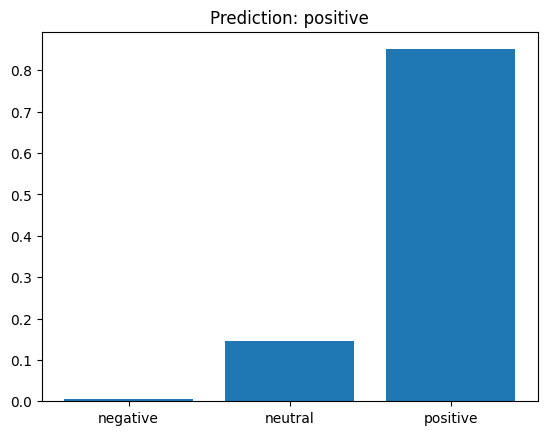

In [ ]:
# Call graph_results using the prediction array and index 0 (since there's only 1 result).
graph_results(pred_array,0)

# Understanding Scraped Data




```
# This is formatted as code
```

## Task 1: Get Reviews
Use BeautifulSoup object to get all the reviews from the web page.

In [ ]:
# Create a beautiful soup object and use it to find all the reviews on the page.
from bs4 import BeautifulSoup
import requests

# Save all the reviews to a variable called reviews.
URL="https://viraaj92.github.io"
page=requests.get(URL)
soup=BeautifulSoup(page.content, "html.parser")
reviews=soup.find_all(id="content")

## Task 2: Clean Up
Remove all the extra text from these reviews.

In [ ]:
# Clean all the review data and save it to an array called clean_reviews.
clean_reviews=[]
for review in reviews:
    text=review.get_text().strip()
    clean_reviews.append(text)

# Print out the clean reviews.
print(clean_reviews)

['I liked this shirt a lot it looks very cool and all my friends complimented me.', 'This shirt is terrible. I hate the design, it looks awful!', "This shirt is okay. It's not the best and not the worst.", 'This shirt is good. The material is soft and comfortable to wear.', "I think this shirt is alright. The sizing isn't great and the design is very bland and boring.", 'The shirt is very plain and it was itchy to wear. Aditionally it shrunk in the washer.', 'This shirt looked wonderful and was very durable!']


## Task 3: Vectorize the Reviews and Predict


1/1 [==============================] - 0s 67ms/step
I liked this shirt a lot it looks very cool and all my friends complimented me.
This shirt is terrible. I hate the design, it looks awful!
This shirt is okay. It's not the best and not the worst.
This shirt is good. The material is soft and comfortable to wear.
I think this shirt is alright. The sizing isn't great and the design is very bland and boring.
The shirt is very plain and it was itchy to wear. Aditionally it shrunk in the washer.
This shirt looked wonderful and was very durable!


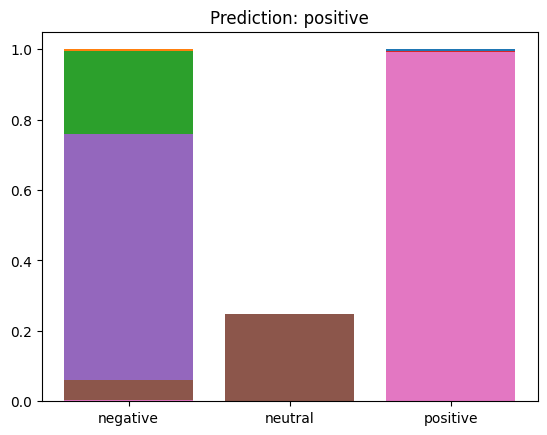

In [ ]:
# Vectorize the cleaned reviews.
x=vectorize(clean_reviews, vect)

# Create a predictions array using the model.
pred_array=model.predict(x)

# Graph the output of all the reviews.
for i in range (len(pred_array)):
    print(clean_reviews[i])
    graph_results(pred_array, i)

